Disease condition prediction based on drug reviews

importing libraries

In [ ]:
import pandas as pd #data preprocessig
import itertools #confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)

In [ ]:
data=pd.read_csv('/content/drugsComTrain_raw.tsv',sep='\t')

In [ ]:
data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is

In [ ]:
data.shape

(161297, 7)

In [ ]:
data.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321
Vaginal Yeast Infection                                                 2274
Abnormal Uterine Bleeding                                               2096
Bowel Preparation                                                       1859
ibromyalgia                                                             1791
Smoking Cessation                                                       1780
Migraine                                                                1694
Anxiety and Stress                                                      1663
Major Depressive Disorde                                                1607
Constipation                                                            1595
Panic Disorde                                                           1463
Chronic Pain                                                            1455
Migraine Prevention                                                     1413
Urinary Tract Infection                                                 1316
Muscle Spasm                                                            1244
Osteoarthritis                                                          1239
Generalized Anxiety Disorde                                             1164
Erectile Dysfunction                                                    1086
Opiate Dependence                                                       1079
Irritable Bowel Syndrome                                                1014
Rheumatoid Arthritis                                                     995
Allergic Rhinitis                                                        973
Bacterial Infection                                                      945
Cough                                                                    927
Sinusitis                                                                835
Nausea/Vomiting                                                          747
GERD                                                                     722
Multiple Sclerosis                                                       698
Overactive Bladde                                                        683
Hyperhidrosis                                                            677
Hepatitis C                                                              656
Back Pain                                                                616
HIV Infection                                                            615
High Cholesterol                                                         611
Psoriasis                                                                598
Schizophrenia                                                            594
Constipation, Chronic                                                    591
Obsessive Compulsive Disorde                                             579
Restless Legs Syndrome                                                   565
Benign Prostatic Hyperplasia                                   

In [ ]:
train_data=data[(data['condition']=='Birth Control')|(data['condition']=="Depression") |(data['condition']=="High Blood Pressure")|(data['condition']=="Diabetes, Type 2")]

In [ ]:
train_data.shape

(42732, 7)

In [ ]:
X=train_data.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [ ]:
X.shape

(42732, 2)

EDA

In [ ]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  
2                                  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."  
3                                                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"  
9                                                      "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."  
11                                                                                                                                                                                                                                                                                                                                  "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 mont

In [ ]:
X_birth=X[(X['condition']=="Birth Control")]
X_dep=X[(X['condition']=="Depression")]
X_bp=X[(X['condition']=="High Blood Pressure")]
X_diab=X[(X['condition']=="Diabetes, Type 2")]

Text(0.5, 1.0, 'Word Cloud of birth control ')

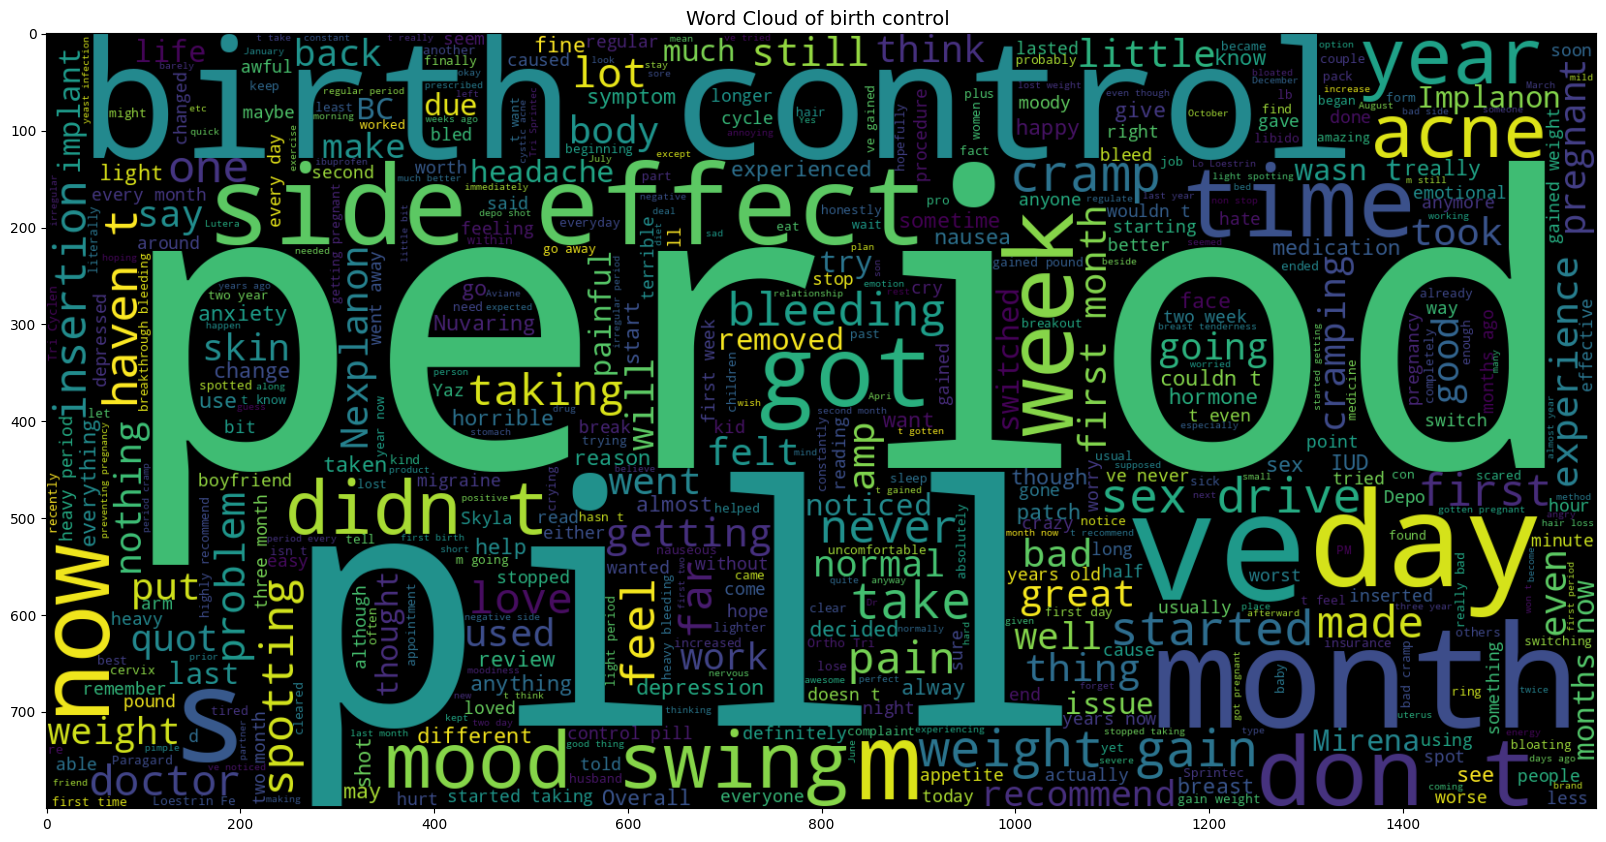

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Cloud of birth control ",fontsize=14)

Text(0.5, 1.0, 'Word Cloud of depression ')

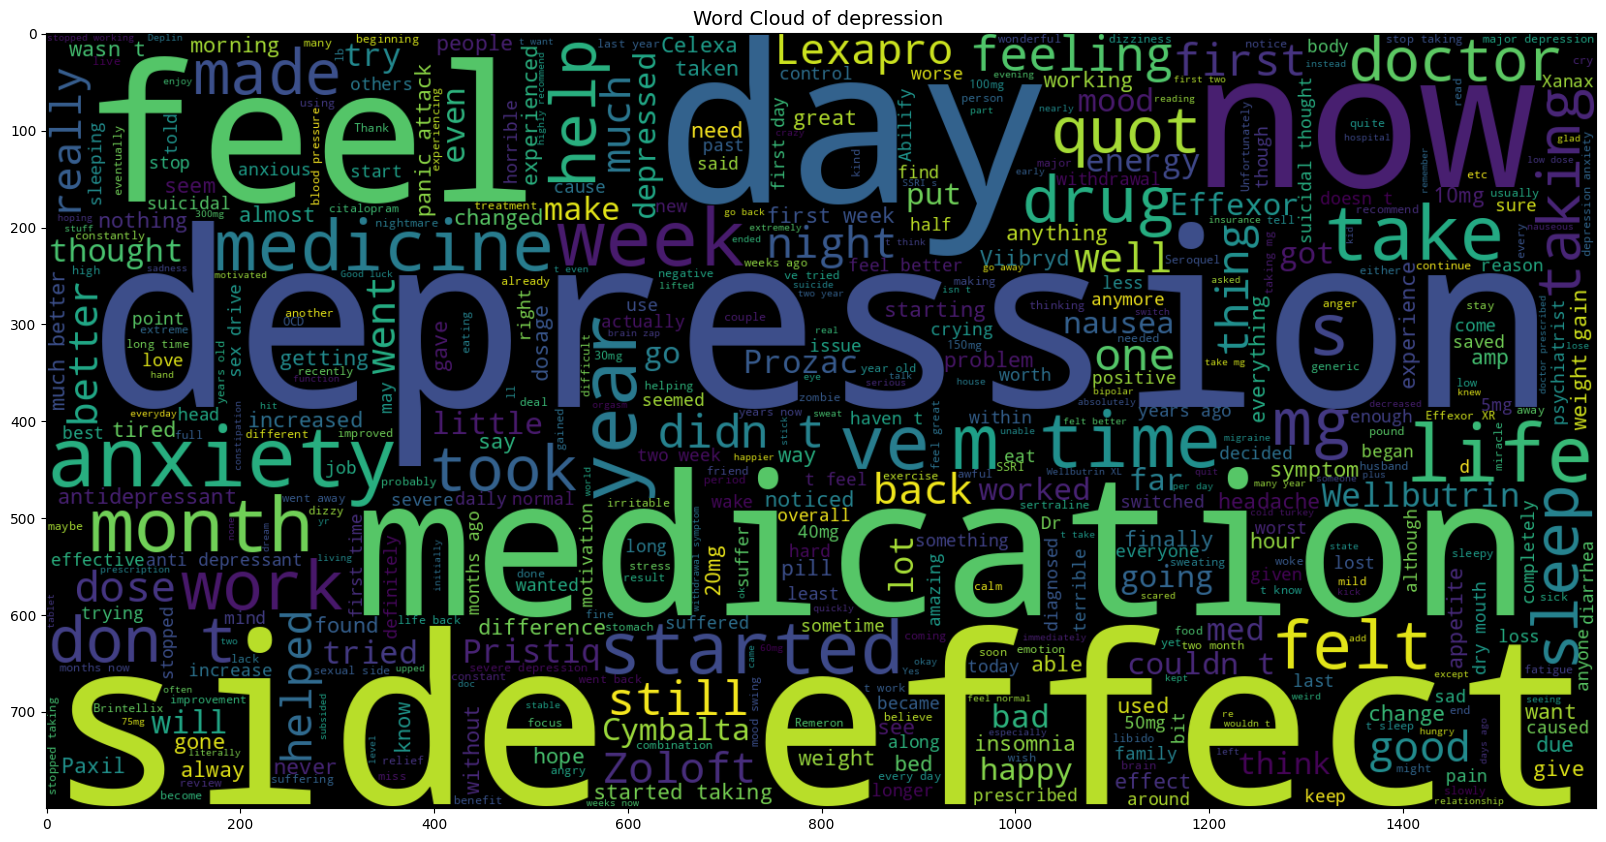

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Cloud of depression ",fontsize=14)

Text(0.5, 1.0, 'Word Cloud of blood pressure ')

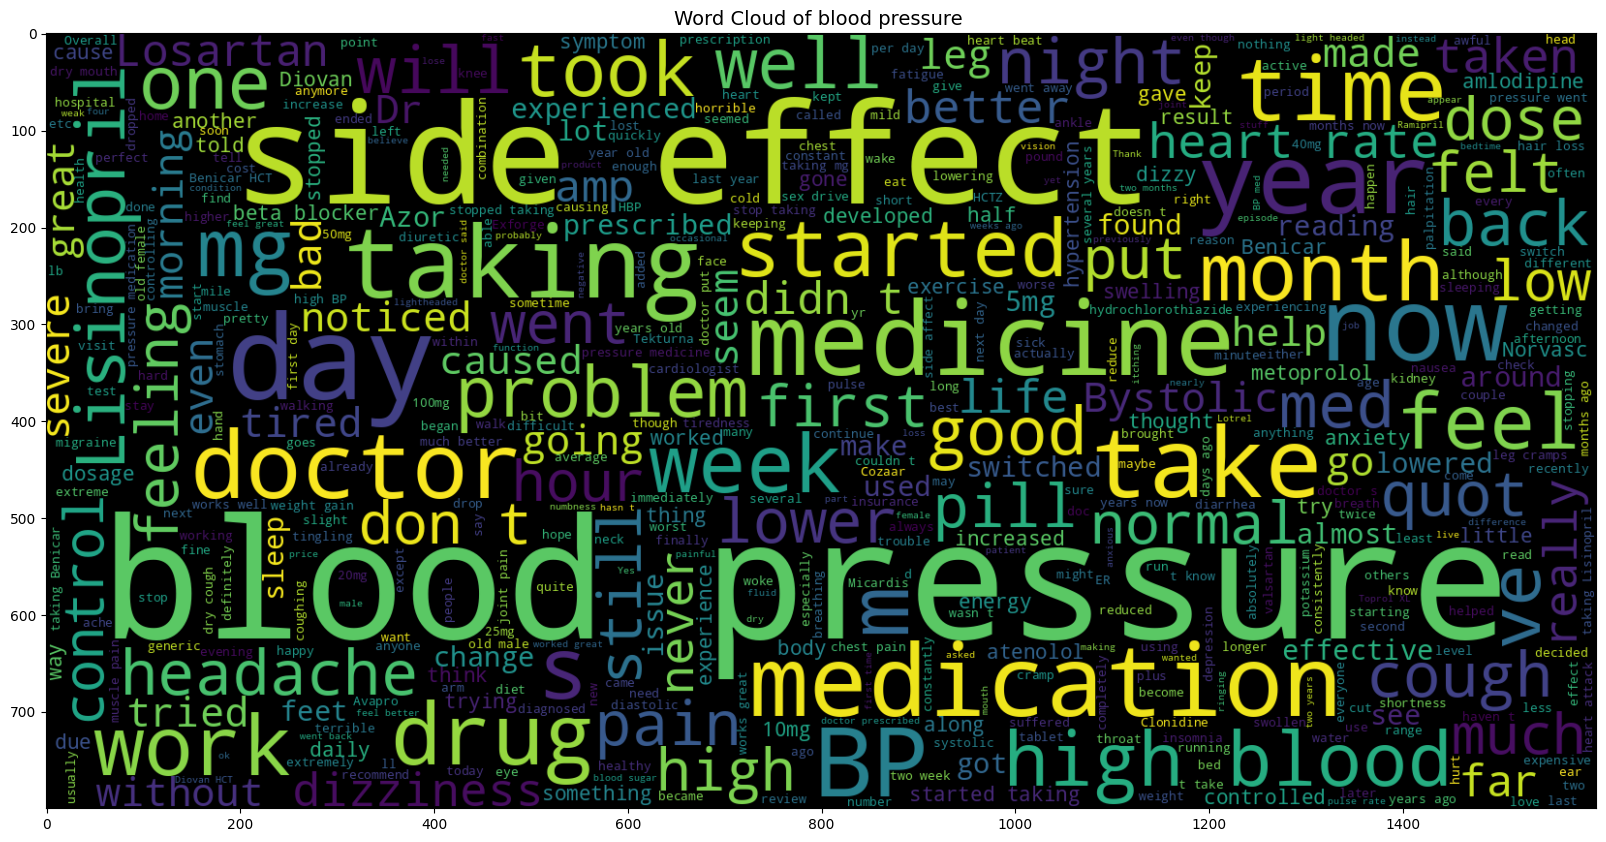

In [ ]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_bp.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Cloud of blood pressure ",fontsize=14)

Text(0.5, 1.0, 'Word Cloud of diabetes ')

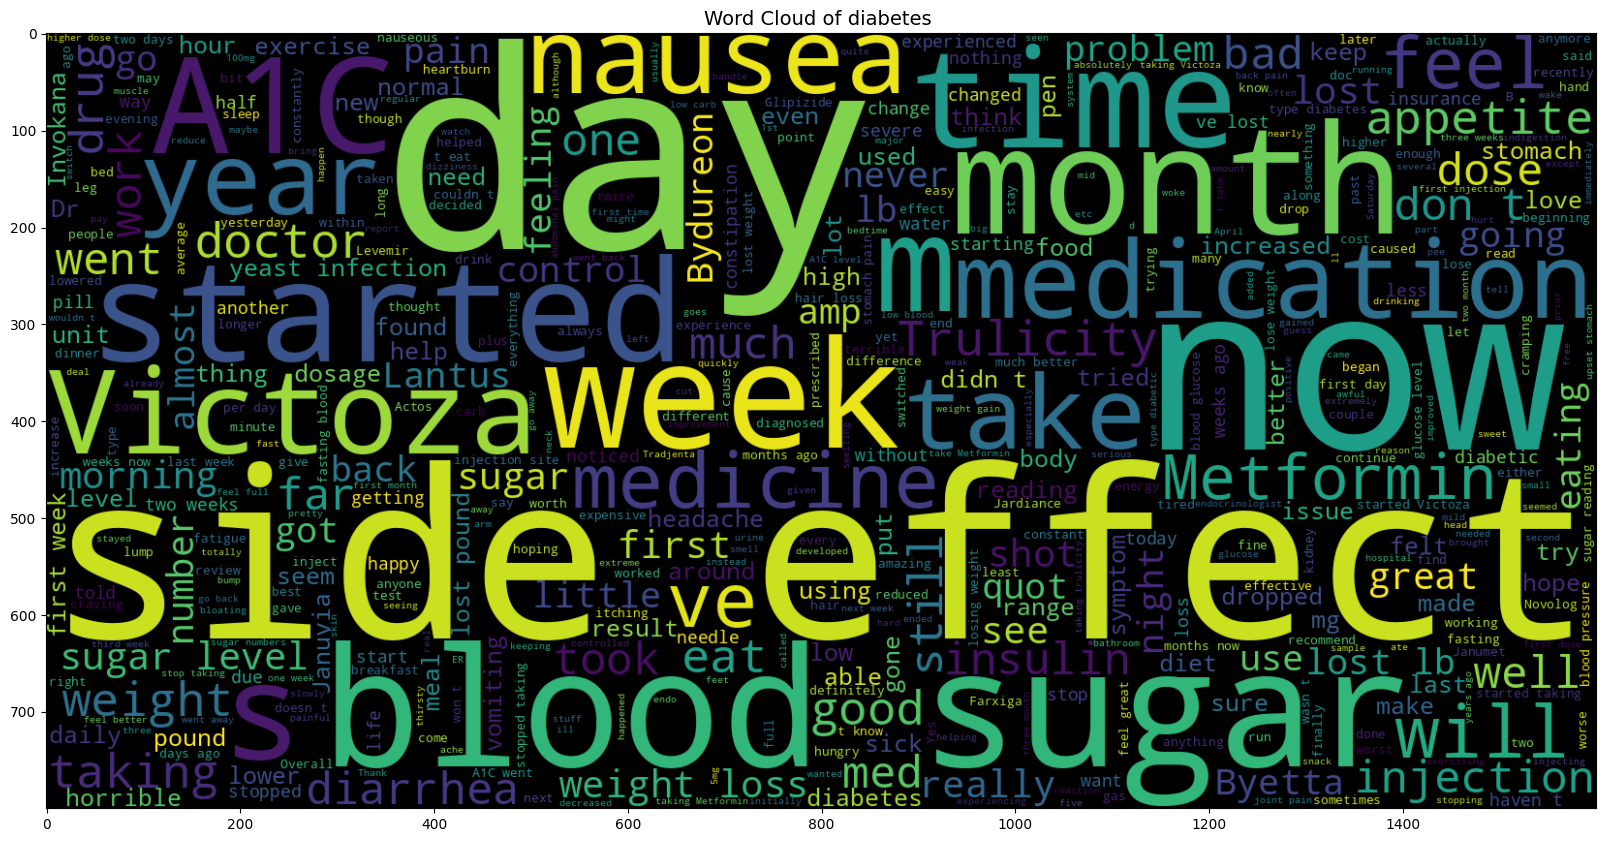

In [ ]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_diab.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Cloud of diabetes ",fontsize=14)

data preprocessing

In [ ]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [ ]:
for i, col in enumerate(X.columns):
  X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [ ]:
pd.set_option('max_colwidth', None)


In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now an

stop words

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words("english")

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

lemmitization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer =WordNetLemmatizer()

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def review_to_words(raw_review):
  #delete html
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()
  #make a space
  letters_only =re.sub('[^a-zA-Z]',' ',review_text)
  #lower letters
  words=letters_only.lower().split()
  #stop words
  meaningful_words=[w for w in words if not w in stop]
  lemmitize_words=[lemmatizer.lemmatize(w)for w in meaningful_words]
  return (' '.join(lemmitize_words))

In [ ]:
X["review_clean"]=X["review"].apply(review_to_words)

<ipython-input-83-1d3449bbb5d4>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()


In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months no

Feature and target value

In [ ]:
x=X['review_clean']
y=X['condition']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

bag of words

In [ ]:
count_vectorizer=CountVectorizer(stop_words="english")
count_train=count_vectorizer.fit_transform(x_train)
count_test=count_vectorizer.transform(x_test)

machine learning model : naive bayes

In [ ]:
mnb = MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print(score)

0.9701649701649702


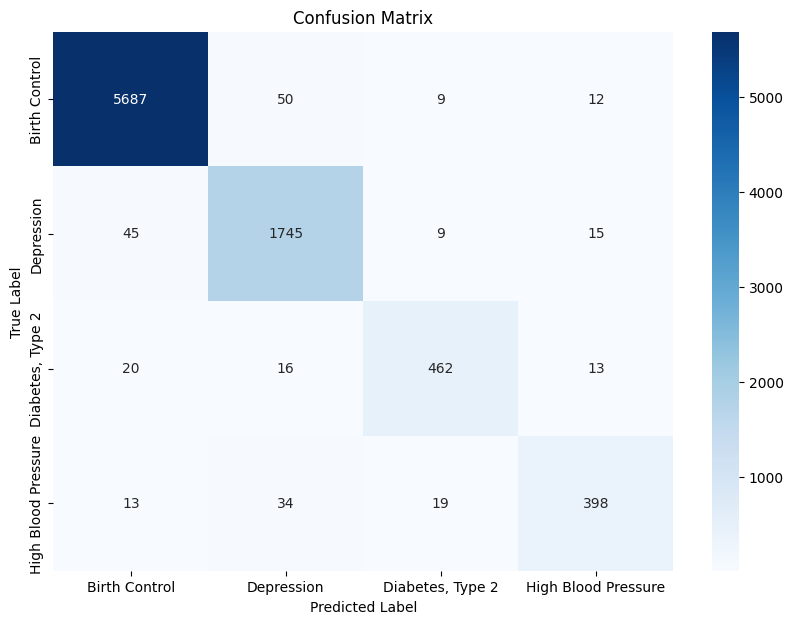

In [ ]:
# Generate the confusion matrix
confusion = metrics.confusion_matrix(y_test, pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

machine learning model : passive aggressive classifier

Accuracy Score: 0.98


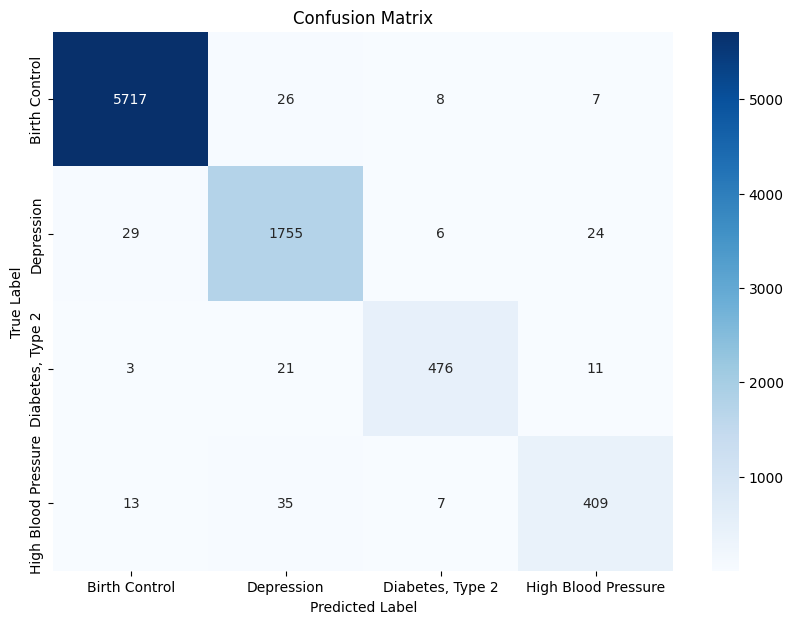

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
# Initialize the Passive Aggressive Classifier
passive = PassiveAggressiveClassifier()

# Fit the model
passive.fit(count_train, y_train)

# Make predictions
pred = passive.predict(count_test)

# Calculate accuracy score
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy Score: {score:.2f}")

# Generate the confusion matrix
confusion = metrics.confusion_matrix(y_test, pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TFIDF :Term Frequency-Inverse Document Frequency

Interpretation: A high TF-IDF score indicates that the term is important in the document relative to the entire corpus. Thus, it helps to identify relevant keywords for the documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
# Transform the testing data
tfidf_test = tfidf_vectorizer.transform(x_test)

If max_df is a float, it represents a percentage (from 0.0 to 1.0) of documents. For example, setting max_df=0.8 means that any term appearing in more than 80% of the documents will be ignored.

machine learning model : naive bayes

In [ ]:
# Create and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(tfidf_train, y_train)

# Predict the test data
pred = mnb.predict(tfidf_test)

# Calculate accuracy score
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score}")

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.9214929214929215
Confusion Matrix:
[[5750    8    0    0]
 [ 192 1622    0    0]
 [ 195   28  285    3]
 [ 152   91    2  219]]


In [ ]:
# Create and train the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
pass_tf.fit(tfidf_train, y_train)

# Predict the test data
pred = pass_tf.predict(tfidf_test)

# Calculate accuracy score
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score}")

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.9810459810459811
Confusion Matrix:
[[5721   27    5    5]
 [  23 1767    9   15]
 [   3   17  483    8]
 [  10   35    5  414]]


TFIDF :BIGRAMS

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1, 2))
# Fit and transform the training data
tfidf_train_2 = tfidf_vectorizer2.fit_transform(x_train)
# Transform the testing data
tfidf_test_2 = tfidf_vectorizer2.transform(x_test)

In [ ]:
# Create and train the Passive Aggressive Classifier
pass_tf2 = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
pass_tf2.fit(tfidf_train_2, y_train)

# Predict the test data
pred = pass_tf2.predict(tfidf_test_2)

# Calculate accuracy score
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score}")

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.9858429858429858
Confusion Matrix:
[[5738   13    5    2]
 [  16 1788    4    6]
 [   4   18  482    7]
 [  11   28    7  418]]


TFIDF :Trigrams

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1, 3))
# Fit and transform the training data
tfidf_train_3 = tfidf_vectorizer2.fit_transform(x_train)
# Transform the testing data
tfidf_test_3 = tfidf_vectorizer2.transform(x_test)

In [ ]:
# Create and train the Passive Aggressive Classifier
pass_tf3 = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
pass_tf3.fit(tfidf_train_3, y_train)

# Predict the test data
pred = pass_tf3.predict(tfidf_test_3)

# Calculate accuracy score
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score}")

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.9858429858429858
Confusion Matrix:
[[5738   13    5    2]
 [  16 1788    4    6]
 [   4   18  482    7]
 [  11   28    7  418]]


most important features

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    # Get the index of the class label
    labelid = list(classifier.classes_).index(classlabel)

    # Use get_feature_names_out() for newer versions of scikit-learn
    feature_names = vectorizer.get_feature_names_out()

    # Get the top n features with the highest coefficients
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    # Print the top n informative features
    for coef, feat in topn:
        print(classlabel, feat, coef)

# Example usage
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, "Birth Control")


Birth Control spotting 5.142997231761246
Birth Control pregnant 5.242295794531312
Birth Control bc 5.360021578937007
Birth Control nuvaring 5.653131831935012
Birth Control pill 5.909499721886423
Birth Control insertion 6.016593503266398
Birth Control bleeding 6.688798813086732
Birth Control acne 8.546483813618758
Birth Control birth 9.948387224676026
Birth Control period 9.991877858128245


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,"Depression")

Depression depression 6.687170471717061
Depression celexa 6.728500487322165
Depression fetzima 6.871470609251708
Depression effexor 6.980115895517607
Depression cymbalta 7.165395168624674
Depression viibryd 7.449670922436967
Depression lexapro 7.497390187007361
Depression zoloft 7.635415491800348
Depression wellbutrin 8.970595504846191
Depression pristiq 10.94392601170633


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,"High Blood Pressure")


High Blood Pressure diovan 4.214503283890747
High Blood Pressure atenolol 4.369899055418806
High Blood Pressure benicar 4.545945953077783
High Blood Pressure micardis 5.2792187365291685
High Blood Pressure bystolic 5.423746365148074
High Blood Pressure metoprolol 5.468528380792991
High Blood Pressure losartan 5.6651466382209
High Blood Pressure pressure 5.848686118534771
High Blood Pressure bp 6.795085906946727
High Blood Pressure lisinopril 7.34510076302655


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,"Diabetes, Type 2")


Diabetes, Type 2 pen 4.750595337416069
Diabetes, Type 2 diabetes 4.8937207774781495
Diabetes, Type 2 injection 5.304557149988954
Diabetes, Type 2 byetta 5.849721262511736
Diabetes, Type 2 januvia 6.145820765359235
Diabetes, Type 2 invokana 6.162983684867142
Diabetes, Type 2 trulicity 6.395533577520704
Diabetes, Type 2 sugar 7.4159615638583665
Diabetes, Type 2 metformin 7.5963619997145
Diabetes, Type 2 victoza 7.698191985561476


sample prediction

In [ ]:
text = ["This is my first time using any form of birth control. I'm glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that, I'm happy with the patch."]

# Transform the text using TfidfVectorizer
test = tfidf_vectorizer.transform(text)

# Make a prediction using the Passive Aggressive Classifier
pred1 = pass_tf.predict(test)[0]

print(f"Predicted class: {pred1}")


Predicted class: Birth Control
